AUTO SELL ON EBAY

1. Import and Reading Data

In [50]:
# Importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# Opening database
auto = pd.read_csv("D:\\CODS\\_Data Science - Portfolio Projects\\! IN PROGRESS\\2. EDA\\EDA (Exploratory data analysis) -  Sell auto from eBay\\Data\\autos.csv", encoding='Latin-1')
auto.head(6)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07


In [53]:
# Checking shape of the data base
auto.shape

(371528, 20)

In [54]:
auto.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

2. Data Preparation

In [55]:
# Dropping uneccesary columns
newAutoDf = auto.drop(axis = "columns", labels = ["abtest", "vehicleType", "monthOfRegistration", "dateCreated", "nrOfPictures", "postalCode", "lastSeen"])
newAutoDf.head()

,dateCrawled,name,seller,offerType,price,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,1993,manuell,0,golf,150000,benzin,volkswagen,NaN
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,2011,manuell,190,NaN,125000,diesel,audi,ja
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,2004,automatik,163,grand,125000,diesel,jeep,NaN
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,2008,manuell,69,fabia,90000,diesel,skoda,nein


In [56]:
# Filtering all data frame by offert from private seller and only by oferts(Anglebot)
filterPrivate = newAutoDf.seller == "privat"
filterOfferts = newAutoDf.offerType == "Angebot"
newAutoDf = newAutoDf.loc[filterPrivate & filterOfferts].copy()
newAutoDf.head()

,dateCrawled,name,seller,offerType,price,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,1993,manuell,0,golf,150000,benzin,volkswagen,NaN
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,2011,manuell,190,NaN,125000,diesel,audi,ja
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,2004,automatik,163,grand,125000,diesel,jeep,NaN
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,2008,manuell,69,fabia,90000,diesel,skoda,nein


In [57]:
# Converting column dataCrawler to the date type
newAutoDf.dateCrawled = pd.to_datetime(newAutoDf.dateCrawled).dt.to_period("D")
newAutoDf.head()

,dateCrawled,name,seller,offerType,price,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,2016-03-24,Golf_3_1.6,privat,Angebot,480,1993,manuell,0,golf,150000,benzin,volkswagen,NaN
1,2016-03-24,A5_Sportback_2.7_Tdi,privat,Angebot,18300,2011,manuell,190,NaN,125000,diesel,audi,ja
2,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,2004,automatik,163,grand,125000,diesel,jeep,NaN
3,2016-03-17,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,2008,manuell,69,fabia,90000,diesel,skoda,nein


In [58]:
# Checking how many NULL values are in each columns in data frame
newAutoDf.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
yearOfRegistration        0
gearbox               20203
powerPS                   0
model                 20481
kilometer                 0
fuelType              33379
brand                     0
notRepairedDamage     72053
dtype: int64

In [60]:
# Dropping NaN values
newAutoDf.dropna(inplace=True)
newAutoDf.shape

(269128, 13)

In [61]:
# Checking current status of the database
newAutoDf.head()

,dateCrawled,name,seller,offerType,price,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
3,2016-03-17,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,2008,manuell,69,fabia,90000,diesel,skoda,nein
5,2016-04-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,1995,manuell,102,3er,150000,benzin,bmw,ja
6,2016-04-01,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein
7,2016-03-21,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,1980,manuell,50,andere,40000,benzin,volkswagen,nein


In [62]:
# Use regex replace only special characters and keeping numbers,letters and spaces and change all letters to upper
newAutoDf.name = newAutoDf.name.str.replace(r'[^0-9a-zA-Z,\s]+', "_", regex=True)
newAutoDf.name = newAutoDf.name.apply(lambda x: x.upper())
newAutoDf.head()

,dateCrawled,name,seller,offerType,price,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
3,2016-03-17,GOLF_4_1_4_3T_RER,privat,Angebot,1500,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,2016-03-31,Skoda_Fabia_1_4_TDI_PD_Classic,privat,Angebot,3600,2008,manuell,69,fabia,90000,diesel,skoda,nein
5,2016-04-04,BMW_316i_e36_Limousine_Bastlerfahrzeug_Export,privat,Angebot,650,1995,manuell,102,3er,150000,benzin,bmw,ja
6,2016-04-01,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein
7,2016-03-21,VW_Derby_Bj_80_Scheunenfund,privat,Angebot,0,1980,manuell,50,andere,40000,benzin,volkswagen,nein


In [64]:
# Reseting index
newAutoDf= newAutoDf.reset_index(drop=True)
newAutoDf.head()

,dateCrawled,name,seller,offerType,price,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,2016-03-17,GOLF_4_1_4_3T_RER,privat,Angebot,1500,2001,manuell,75,golf,150000,benzin,volkswagen,nein
1,2016-03-31,SKODA_FABIA_1_4_TDI_PD_CLASSIC,privat,Angebot,3600,2008,manuell,69,fabia,90000,diesel,skoda,nein
2,2016-04-04,BMW_316I_E36_LIMOUSINE_BASTLERFAHRZEUG_EXPORT,privat,Angebot,650,1995,manuell,102,3er,150000,benzin,bmw,ja
3,2016-04-01,PEUGEOT_206_CC_110_PLATINUM,privat,Angebot,2200,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein
4,2016-03-21,VW_DERBY_BJ_80_SCHEUNENFUND,privat,Angebot,0,1980,manuell,50,andere,40000,benzin,volkswagen,nein


In [65]:
# Converting data types for save memory
convDict = {"gearbox":"category", "fuelType":"category", "model":"category", "brand":"category"}
newAutoDf = newAutoDf.astype(convDict)

In [66]:
newAutoDf.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269128 entries, 0 to 269127
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype    
---  ------              --------------   -----    
 0   dateCrawled         269128 non-null  period[D]
 1   name                269128 non-null  object   
 2   seller              269128 non-null  object   
 3   offerType           269128 non-null  object   
 4   price               269128 non-null  int64    
 5   yearOfRegistration  269128 non-null  int64    
 6   gearbox             269128 non-null  category 
 7   powerPS             269128 non-null  int64    
 8   model               269128 non-null  category 
 9   kilometer           269128 non-null  int64    
 10  fuelType            269128 non-null  category 
 11  brand               269128 non-null  category 
 12  notRepairedDamage   269128 non-null  object   
dtypes: category(4), int64(4), object(4), period[D](1)
memory usage: 82.7 MB


In [67]:
# Checking basic metrics in our data frame and look-out for outliers
newAutoDf.describe()

,price,yearOfRegistration,powerPS,kilometer
count,2.691280e+05,269128.000000,269128.000000,269128.000000
mean,8.100325e+03,2003.739529,125.088679,124272.985345
std,3.386123e+05,24.108856,148.681252,39769.212950
min,0.000000e+00,1600.000000,0.000000,5000.000000
25%,1.500000e+03,1999.000000,75.000000,100000.000000
50%,3.750000e+03,2004.000000,116.000000,150000.000000
75%,8.500000e+03,2008.000000,150.000000,150000.000000
max,1.000000e+08,9000.000000,20000.000000,150000.000000


In [ ]:
# The table above shows that there are some errors, e.g. car registration for the year 1600 -> ;-), or a rather lively car with a power of 20,000 horses ;-)
# Let's get on with it

In [17]:
newAutoDf.shape

(269128, 13)

In [68]:
# Removing outliers from the column PRICE
# Setting 1st and 3rd boundary quartiles
q1 = np.quantile(newAutoDf.price, 0.25)
q3 = np.quantile(newAutoDf.price, 0.75) 
IQR = q3 - q1

print(f"IQR for price is: {IQR}")

# Setting upper and lower filter range for PRICE
PriceLowerLimitFilter = q1 - 1.5* IQR
PriceUpperLimitFilter = q3 + 1.5* IQR

print(PriceLowerLimitFilter)
print(PriceUpperLimitFilter)

# Appling filers PRICE on data frame
newPriceLowerRange = newAutoDf.price > PriceLowerLimitFilter
newPriceUpperRange = newAutoDf.price < PriceUpperLimitFilter


IQR for price is: 7000.0
-9000.0
19000.0


In [70]:
# Removing outliers from the column PowerPS
# Setting 1st and 3rd boundary quartiles
q1 = np.quantile(newAutoDf.powerPS, 0.25)
q3 = np.quantile(newAutoDf.powerPS, 0.75) 
IQR = q3 - q1

print(f"IQR for PowerPS is: {IQR}")

# Setting upper and lower filter range for PowerPS
PowerPSLowerLimitFilter = q1 - 1.5* IQR
PowerPSUpperLimitFilter = q3 + 1.5* IQR

print(PowerPSLowerLimitFilter)
print(PowerPSUpperLimitFilter)

# Appling filers PowerPS on data frame
newPowerPSLowerRange = newAutoDf.powerPS > PowerPSLowerLimitFilter
newPowerPSUpperRange = newAutoDf.powerPS < PowerPSUpperLimitFilter

IQR for PowerPS is: 75.0
-37.5
262.5


In [71]:
# Removing outliers from the yearOfRegistration
# Setting 1st and 3rd boundary quartiles
q1 = np.quantile(newAutoDf.yearOfRegistration, 0.25)
q3 = np.quantile(newAutoDf.yearOfRegistration, 0.75) 
IQR = q3 - q1

print(f"IQR for yearOfRegistration is: {IQR}")

# Setting upper and lower filter range for yearOfRegistration
YearLowerLimitFilter = q1 - 1.5* IQR
YearUpperLimitFilter = q3 + 1.5* IQR

print(YearLowerLimitFilter)
print(YearUpperLimitFilter)

# Appling filers yearOfRegistration on data frame
newYearLowerRange = newAutoDf.yearOfRegistration > YearLowerLimitFilter
newYearUpperRange = newAutoDf.yearOfRegistration < YearUpperLimitFilter


IQR for yearOfRegistration is: 9.0
1985.5
2021.5


In [72]:
# Appling all filers on the data frame
df = newAutoDf[newPriceUpperRange & newPriceLowerRange & newPowerPSUpperRange & newPowerPSLowerRange & newYearLowerRange & newYearUpperRange]
df.shape

(243969, 13)

3. FEATURE UNDERSTAND

In [73]:
# Overviewing on the data frame
df.head()

,dateCrawled,name,seller,offerType,price,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,2016-03-17,GOLF_4_1_4_3T_RER,privat,Angebot,1500,2001,manuell,75,golf,150000,benzin,volkswagen,nein
1,2016-03-31,SKODA_FABIA_1_4_TDI_PD_CLASSIC,privat,Angebot,3600,2008,manuell,69,fabia,90000,diesel,skoda,nein
2,2016-04-04,BMW_316I_E36_LIMOUSINE_BASTLERFAHRZEUG_EXPORT,privat,Angebot,650,1995,manuell,102,3er,150000,benzin,bmw,ja
3,2016-04-01,PEUGEOT_206_CC_110_PLATINUM,privat,Angebot,2200,2004,manuell,109,2_reihe,150000,benzin,peugeot,nein
5,2016-03-26,MAZDA_3_1_6_SPORT,privat,Angebot,2000,2004,manuell,105,3_reihe,150000,benzin,mazda,nein


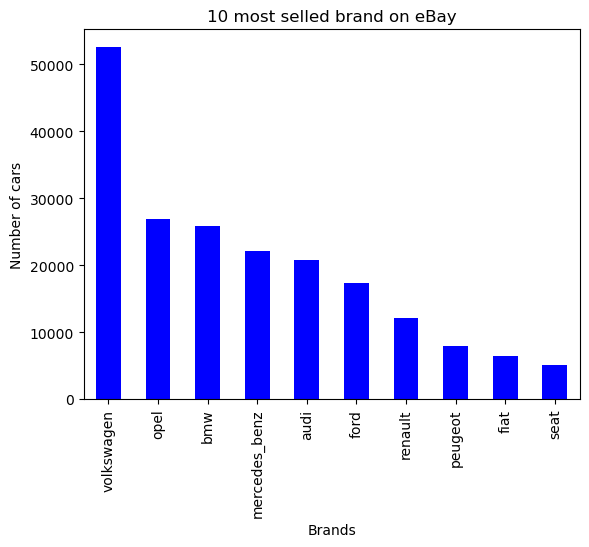

In [74]:
# Showing 10 Most common car brands available to buy
ax = df.brand.value_counts() \
    .head(10) \
    .plot(kind = "bar", title ="10 most selled brand on eBay", color = "blue")
ax.set_xlabel("Brands")
ax.set_ylabel("Number of cars")
plt.show()

[Text(0, 0.5, 'price'), Text(0.5, 0, 'quantity')]

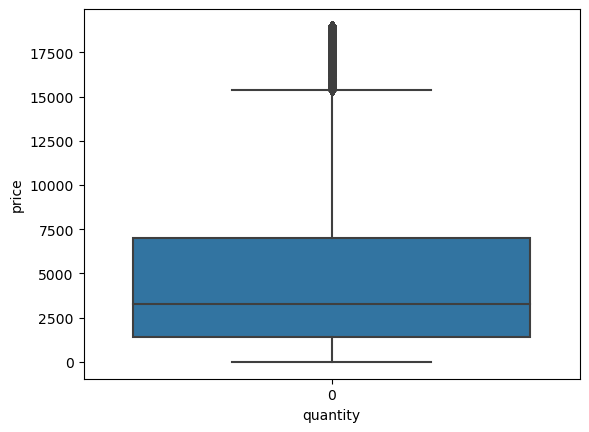

In [102]:
# Showing outliers on boxplots
sns.boxplot(data = df.price).set(xlabel = "quantity", ylabel="price")
plt.show()

[Text(0.5, 0, 'quantity'), Text(0, 0.5, 'powerPS')]

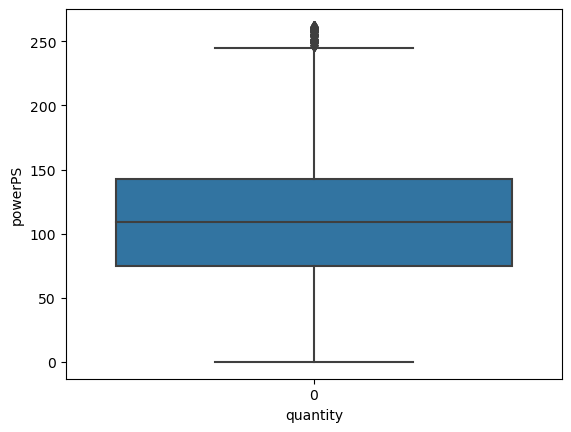

In [103]:
sns.boxplot(data = df.powerPS).set(xlabel = "quantity", ylabel="powerPS")
plt.show()

[Text(0.5, 0, 'quantity'), Text(0, 0.5, 'year of regitration')]

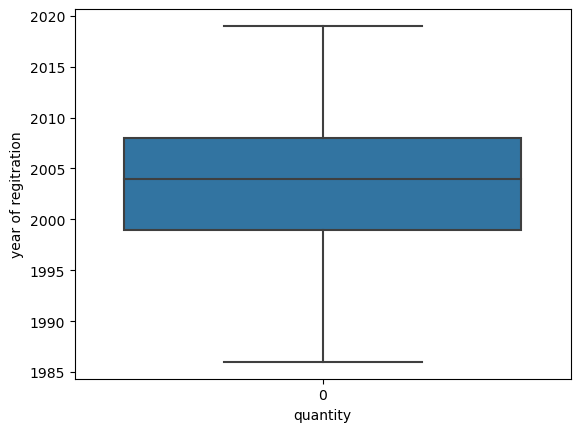

In [104]:
sns.boxplot(data = df.yearOfRegistration).set(xlabel = "quantity", ylabel="year of registration")
plt.show()

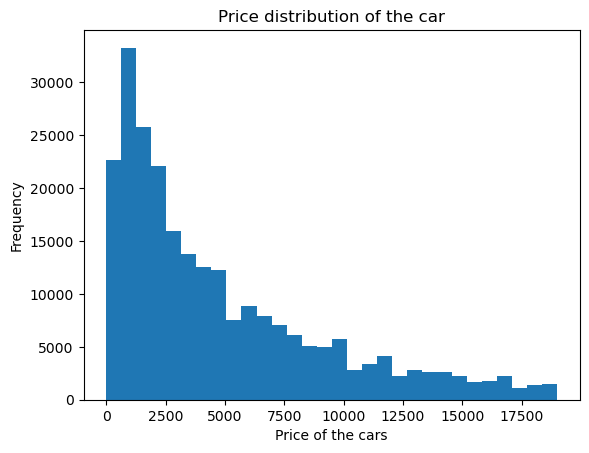

In [105]:
# Ploting distribution about price
ax = df.price.plot(kind = "hist", bins = 30, title = "Price distribution of the car")
ax.set_xlabel("Price of the cars")
plt.show()

4. Feature Relationship

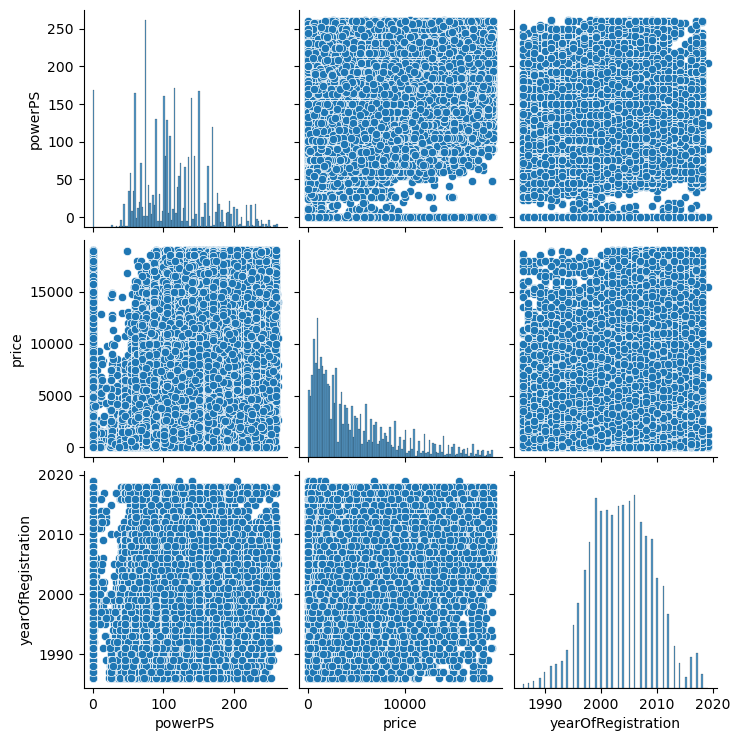

In [108]:
sns.pairplot(data = df, vars=["powerPS", "price", "yearOfRegistration"])

In [87]:
# Checking correlation between numerical values
df_corr = df[["powerPS", "price", "yearOfRegistration"]].corr()
df_corr 

,powerPS,price,yearOfRegistration
powerPS,1.000000,0.471768,0.127961
price,0.471768,1.000000,0.596425
yearOfRegistration,0.127961,0.596425,1.000000


<Axes: >

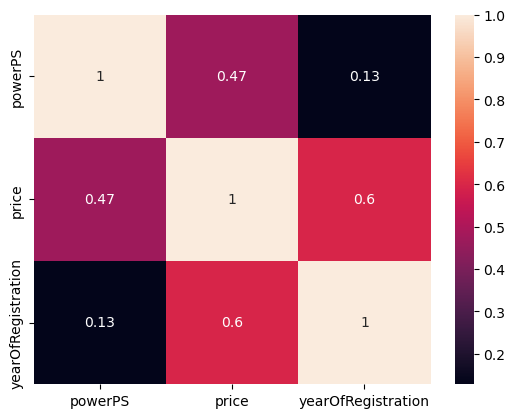

In [90]:
sns.heatmap(df_corr, annot = True)